# LetsGrowMore Internship

# Task 1(Advance_Level)

# Task - Develop_A_Neural_Network_that_Can_Read_Handwritting

# by - Mrinal Kumar (Batch- March 2023)

# 

# 

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout
import numpy as np
from keras.utils.generic_utils import get_custom_objects

We are going to use handwritten keras library it will load train and test digit dataset into these variables.

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# let see how many samples we have
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
# each individual samples
X_train[0].shape # it shows 28*28 pixel image

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Randomly Checking training image

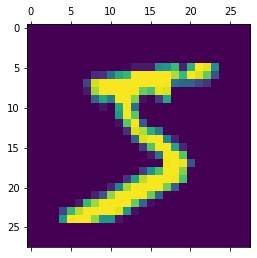

In [8]:
plt.matshow(X_train[0])
plt.show()

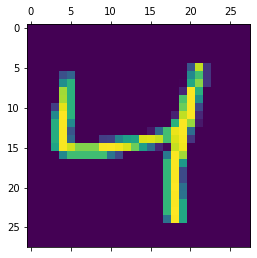

In [9]:
plt.matshow(X_train[2])
plt.show()

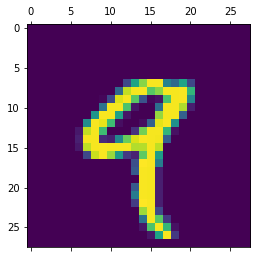

In [10]:
plt.matshow(X_train[4])
plt.show()

# Check out position

In [11]:
y_train[2] # in no. 2 position there is no. 4

4

In [12]:
y_train[3]

1

In [13]:
y_train[:6] # it is containing the no. 0 to 9

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [14]:
y_train[:7]

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Flatten our training dataset because we convert into single dimension array

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
len(X_test)

10000

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train_flattened = X_train.reshape(len(X_train),28*28) # we want to convert 2d array to 1d array through flatten X_train and X_test
X_test_flattened = X_test.reshape(len(X_test),28*28) #

In [21]:
X_train_flattened.shape

(60000, 784)

In [22]:
X_test_flattened.shape

(10000, 784)

In [23]:
X_train_flattened[0] # converted to 1D

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Created Neural Network

Sequential means we are having stack of layers in our Neural Network every layer as one element.

Optimizer train efficiently bacward propogation and is training going on

In [24]:
keras.losses.CategoricalCrossentropy(from_logits=True)

model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4739 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9255


I want to increase my accuracy so I scaled my values, 255 divide by whole array

92% accuracy means accurate train data

In [27]:
# evaluate the accuracy on test data set

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9249


[0.26809966564178467, 0.9248999953269958]

same 92% accuracy came, this model is pretty good

In [28]:
# predict our test data

model.predict(X_test_flattened)

array([[1.5038848e-02, 3.5150731e-07, 4.0809989e-02, ..., 9.9977809e-01,
        7.9222500e-02, 6.2777770e-01],
       [3.2807058e-01, 1.2120992e-02, 9.9933302e-01, ..., 1.7595084e-12,
        2.4979356e-01, 2.3884004e-09],
       [2.1380186e-04, 9.9449813e-01, 5.8768237e-01, ..., 1.2631330e-01,
        3.6447293e-01, 4.0160179e-02],
       ...,
       [1.1006421e-06, 5.4418306e-06, 9.1764331e-04, ..., 2.2733900e-01,
        4.8373786e-01, 7.5700819e-01],
       [2.8294931e-05, 2.1946430e-04, 9.8844190e-05, ..., 3.9237118e-05,
        5.8257997e-01, 7.0772585e-05],
       [5.5279136e-03, 8.7517277e-10, 1.6500330e-01, ..., 1.6207375e-08,
        2.6476383e-04, 5.5910914e-07]], dtype=float32)

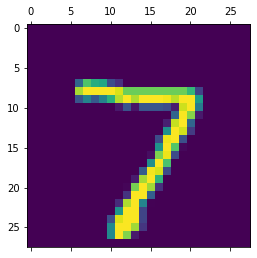

In [29]:
# only prediction for first image
plt.matshow(X_test[0])
plt.show()

In [31]:
# predicted all values

y_predicted = model.predict(X_test_flattened)
y_predicted[0] # 0 is my first image

array([1.5038848e-02, 3.5150731e-07, 4.0809989e-02, 9.4652140e-01,
       1.6250014e-03, 8.9112550e-02, 9.0579698e-07, 9.9977809e-01,
       7.9222500e-02, 6.2777770e-01], dtype=float32)

In [32]:
# lookout the max score
np.argmax(y_predicted[0])

7

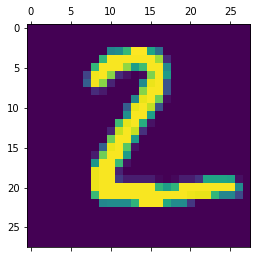

In [33]:
plt.matshow(X_test[1]) # test our model
plt.show()

In [34]:
np.argmax(y_predicted[1])

2

Over actual prediction

# How our prediction look like we build confusion matrix

In [36]:
y_test[:5] # these are integers values and predictions values are whole number so we convert y_pred into concrate class label

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    7,    2,    3,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   4,   15,  905,   20,    8,    6,   11,   10,   50,    3],
       [   1,    0,   15,  921,    0,   26,    2,   14,   26,    5],
       [   2,    1,    6,    1,  912,    0,   10,    4,   10,   36],
       [   7,    3,    2,   27,    8,  791,   13,    6,   29,    6],
       [  10,    3,    8,    1,    8,   21,  902,    2,    3,    0],
       [   1,    8,   19,    8,    4,    0,    0,  960,    4,   24],
       [   4,   14,    5,   20,    9,   30,    8,   13,  865,    6],
       [   8,    7,    1,   10,   25,    7,    0,   26,    8,  917]])>

# Visualization of confusion matrix

In [39]:
import seaborn as sns

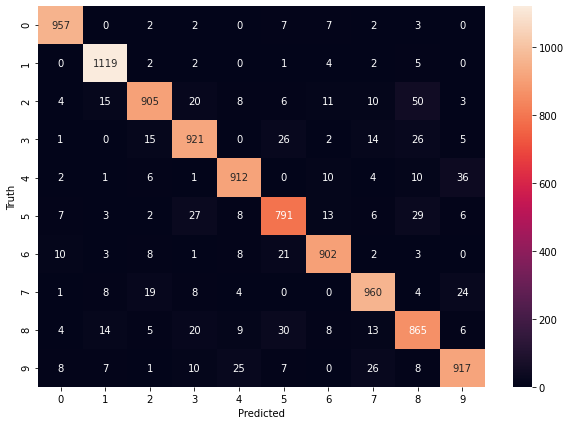

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Anything not in diagonals its error, our model distributed the error in a very good way

In [43]:
# checking hidden layers

model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation='relu'), 
                          keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]) # last layer

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1277 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0895 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0555 - accuracy: 0.9826


accuracy increases to 92% to 98%

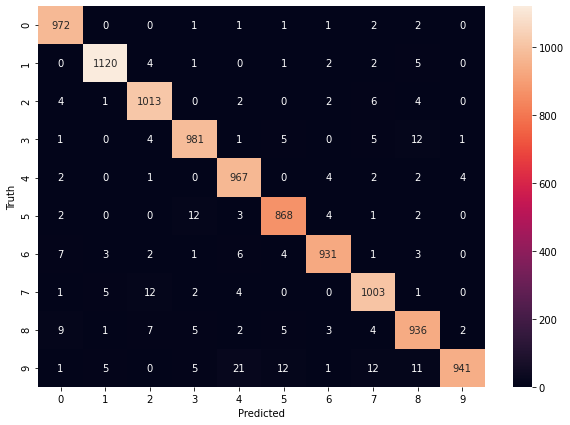

In [44]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Number of error decreases, our model is predicted accurately